In [1]:
import pandas as pd

In [2]:
import matplotlib

In [2]:
import geopandas

In [4]:
from shapely.geometry import Point, Polygon

In [5]:
pd.options.display.max_rows = 10

In [3]:
stations = geopandas.read_file("velib-disponibilite-en-temps-reel.geojson")

In [9]:
stations[['name', 'numdocksavailable', 'numbikesavailable', 'geometry']].head()

,name,numdocksavailable,numbikesavailable,geometry
0,None,18,12,None
1,None,33,2,None
2,Athènes - Clichy,13,7,POINT (2.32956021946 48.8781137879)
3,Bassano - Iéna,8,6,POINT (2.29614960099 48.8681445105)
4,None,56,2,None


In [32]:
quartiers = geopandas.read_file("quartier_paris.geojson")

In [33]:
quartiers.head()

,n_sq_qu,perimetre,objectid,longueur,c_qu,surface,n_sq_ar,c_quinsee,l_qu,c_ar,geometry
0,750000010,2139.625388,50,2139.535591,10,271750.323937,750000003,7510302,Enfants-Rouges,3,"POLYGON ((2.367101341254551 48.86162755885409,..."
1,750000016,3283.163371,56,3282.999717,16,378252.153674,750000004,7510404,Notre-Dame,4,"POLYGON ((2.361313701339139 48.84858030437791,..."
2,750000018,4052.729521,58,4052.473226,18,798389.398463,750000005,7510502,Jardin-des-Plantes,5,"POLYGON ((2.364561460891576 48.84365746114398,..."
3,750000025,3827.253353,7,3827.053421,25,826559.436780,750000007,7510701,Saint-Thomas-d'Aquin,7,"POLYGON ((2.322133508640103 48.84924973446431,..."
4,750000035,2786.541926,17,2786.448978,35,417335.080621,750000009,7510903,Faubourg-Montmartre,9,"POLYGON ((2.340255299125085 48.87660144727086,..."


In [10]:
type(stations)

geopandas.geodataframe.GeoDataFrame

In [11]:
stations.geometry

0                                     None
1                                     None
2      POINT (2.32956021946 48.8781137879)
3      POINT (2.29614960099 48.8681445105)
4                                     None
5                                     None
6      POINT (2.36682649963 48.8348484529)
7                                     None
8                                     None
9                                     None
10     POINT (2.27435453918 48.8687784918)
11                                    None
12                                    None
13     POINT (2.26825738753 48.8498691876)
14                                    None
15     POINT (2.39607900821 48.8971300531)
16                                    None
17     POINT (2.38654145444 48.8863936794)
18                                    None
19                                    None
20                                    None
21     POINT (2.29924407695 48.8486563159)
22      POINT (2.3278616533 48.8223409659)
23         

In [12]:
type(stations.geometry)

geopandas.geoseries.GeoSeries

In [13]:
type(stations.geometry[2])

shapely.geometry.point.Point

In [18]:
quartiers.geometry.area

0     0.000033
1     0.000046
2     0.000098
3     0.000101
4     0.000051
        ...   
75    0.000225
76    0.000099
77    0.000782
78    0.000203
79    0.000134
Length: 80, dtype: float64

In [19]:
notre_dame = Point(2.35005149954546, 48.85293695)

In [21]:
quartiers.contains(notre_dame)

0     False
1      True
2     False
3     False
4     False
      ...  
75    False
76    False
77    False
78    False
79    False
Length: 80, dtype: bool

In [22]:
quartiers[quartiers.contains(notre_dame)]

,n_sq_qu,perimetre,objectid,longueur,c_qu,surface,n_sq_ar,c_quinsee,l_qu,c_ar,geometry
1,750000016,3283.163371,56,3282.999717,16,378252.153674,750000004,7510404,Notre-Dame,4,"POLYGON ((2.361313701339139 48.84858030437791,..."


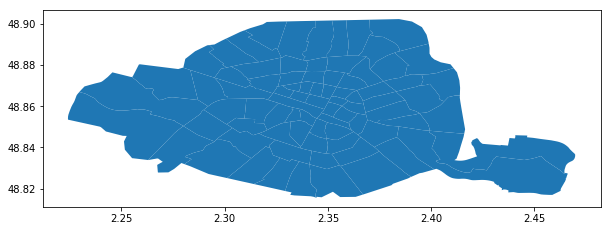

In [29]:
quartiers.plot(figsize=(10, 10))

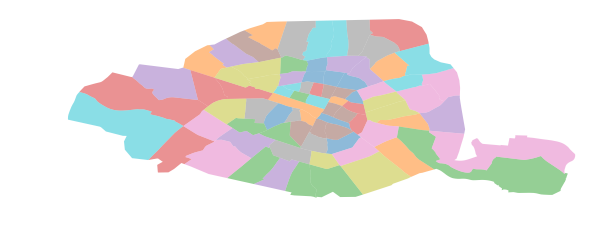

In [24]:
ax = quartiers.plot(figsize=(10, 10), cmap='tab10', alpha=0.5)
ax.set_axis_off()

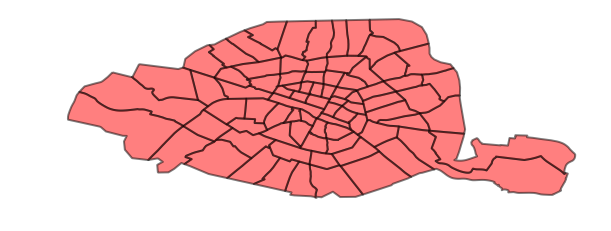

In [25]:
ax = quartiers.plot(figsize=(10, 10), edgecolor='k', facecolor='r', alpha=0.5, linewidth=2)
ax.set_axis_off()

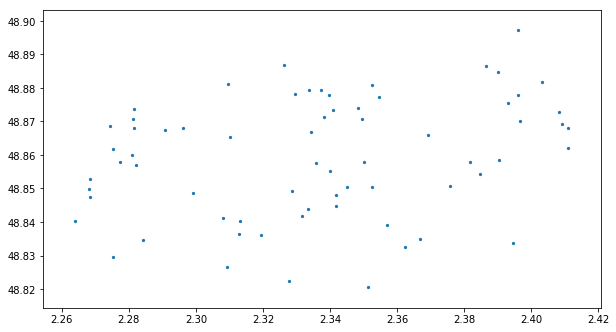

In [18]:
stations.plot(markersize=5, figsize=(10, 10))

In [19]:
streets = geopandas.read_file("openstreetmap_paris/shape/")

In [20]:
streets.head()

,osm_id,name,type,geometry
0,4487769,Chapelle Notre-Dame de l'Assomption,church,"POLYGON ((2.0508149 48.7280457, 2.0507819 48.7..."
1,5013364,Tour Eiffel,attraction,"POLYGON ((2.2942817 48.8576248, 2.2942926 48.8..."
2,5492690,Tour Athènes,tower,"POLYGON ((2.363564 48.8261479, 2.363636 48.826..."
3,5492911,Tour Mexico,tower,"POLYGON ((2.3643369 48.8256781, 2.3641682 48.8..."
4,5492915,Tour Sapporo,tower,"POLYGON ((2.3644028 48.8262331, 2.3643712 48.8..."
